In [127]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.pyplot import savefig

import string
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True)

In [68]:
df_text = pd.read_csv("cleaned_text_data.csv")
df_race = pd.read_csv("cleaned_races_data.csv")

In [69]:
df_text.drop('Unnamed: 0', axis=1, inplace=True)
df_race.drop('Unnamed: 0', axis=1, inplace=True)

In [70]:
df_text.rename(columns = {'ID':'Text_Id'}, inplace = True)
df_text.head()

,Text_Id,Text,Length,Races,Difficulty Rating,Top 100,Average,Top Score WPM,Top Score Full Name,Top Score Nickname,Active Since Month,Active Since Day,Active Since Year
0,1,Geometry sets out from certain conceptions suc...,464,39389,0.879,163.19,77.46,199.48,Sean Wrona,arenasnow2,August,5,2008
1,2,But speculations on the structure of the unive...,295,77023,1.009,173.94,78.35,203.42,Sean Wrona,arenasnow2,August,3,2008
2,3,"No man is an island, entire of itself; every m...",389,69729,0.975,167.48,79.58,210.87,ᗜ John on Plover Stenogra...,NaN,August,3,2008
3,4,"I can feel the heat closing in, feel them out ...",273,79460,0.976,175.19,77.06,238.51,ᗜ John on Plover Stenogra...,NaN,August,3,2008
4,5,"Thirdly, however, these wars could now be wage...",267,75764,0.997,177.07,77.28,229.88,Mirabai On Plover Steno (pl...,NaN,July,27,2008


In [5]:
df_race.head()

,Race,Date,WPM,Accuracy,Text_Id,Date_Epoch,Date_Month,Date_Year,Date_Day,Outcome_Rank,Outcome_No_Racers
0,4126,2018-12-22 00:01:33,78.76,0.96,3810450,1545454893,December,2018,22,3,3
1,4125,2018-12-22 00:00:25,90.25,0.98,3641234,1545454825,December,2018,22,2,5
2,4124,2018-09-27 01:55:37,100.13,0.98,499,1538031337,September,2018,27,1,2
3,4123,2018-09-27 01:54:09,85.26,0.98,3550489,1538031249,September,2018,27,1,2
4,4122,2018-08-11 02:26:29,95.85,0.98,3640093,1533972389,August,2018,11,2,4


### Meta data
There are over 5200 texts active on the typeracer platform. These texts have been added by the users (crowdsourced) and moderated by valikor eventually. 2017 saw a bunch inclusion of around 2900 text pieces. 

In [7]:
df_text['Active Since Year'].value_counts()

2017    2886
2018     743
2016     728
2008     369
2015     141
2009     139
2010     128
2011      71
2012       1
Name: Active Since Year, dtype: int64

In [8]:
df_text.sort_values(by="Length", ascending=False).head()

,ID,Text,Length,Races,Difficulty Rating,Top 100,Average,Top Score WPM,Top Score Full Name,Top Score Nickname,Active Since Month,Active Since Day,Active Since Year
1724,3550910,A material difference may be observed in the g...,861,620,0.923,139.01,100.30,175.91,izzy (secretly believes he ...,NaN,February,14,2018
1618,3550764,Control over consciousness cannot be instituti...,856,561,0.934,138.55,100.76,180.95,hamb0w0rger,chakk,February,14,2018
1224,3550358,It is pleasing to human vanity to believe that...,838,1151,0.993,156.49,109.74,203.20,hamb0w0rger,chakk,October,7,2017
1488,3550623,"Aladeen: Hey, do you remember my favorite spor...",837,444,0.835,122.38,93.50,162.18,road to 160.00 all texts - ...,NaN,December,10,2017
1447,3550582,Everything will continue eternally by performi...,831,930,0.972,151.45,104.72,178.24,🌹 Black Rose 🌹 (rosew...,NaN,December,10,2017


In [9]:
df_text.sort_values(by="Length", ascending=False)['Text'].values[0]

'A material difference may be observed in the games of antiquity: the most eminent of the Greeks were actors, the Romans were merely spectators. The Olympic stadium was open to wealth, merit, and ambition; and if the candidates could depend on their personal skill and activity, they might pursue the footsteps of Diomede and Menelaus, and conduct their own horses in the rapid career... But a senator, or even a citizen, conscious of his dignity, would have blushed to expose his person or his horses in the circus of Rome. The games were established at the expense of the republic, the magistrates, or the emperors; but the reins were abandoned to servile hands; and if the profits of a favourite charioteer sometimes exceeded those of an advocate, they must be considered as the effects of popular extravagance, and the high wages of a disgraceful profession.'

In [10]:
df_text.sort_values(by="Length", ascending=True).head()

,ID,Text,Length,Races,Difficulty Rating,Top 100,Average,Top Score WPM,Top Score Full Name,Top Score Nickname,Active Since Month,Active Since Day,Active Since Year
859,3100095,The quick brown fox jumps over the lazy dog.,44,27091,1.008,210.77,90.65,273.01,ᗜ John on Plover Stenogra...,NaN,April,3,2015
637,638,"Pulp: a soft, moist, shapeless mass or matter.",46,3158,0.726,164.29,74.43,248.09,ᗜ John on Plover Stenogra...,NaN,July,7,2011
1523,3550659,I can fly like an eagle and strike like a hawk.,47,355,1.129,198.80,151.27,259.67,hamb0w0rger,chakk,December,10,2017
1318,3550452,"Now I am become Death, the destroyer of worlds.",47,222,1.012,150.67,119.24,198.24,twitch.tv/graril,slowaccount,December,10,2017
3612,3641380,There will come a time when all of us are dead.,47,626,1.256,200.44,145.10,263.80,ᗜ Plover Steno,stedno,October,9,2017


The longest text in terms of number of characters is 861 character long. While the shortest text is 44 character long and is a sentence which encompasses all the alphabets in English.

In [83]:
df_text.sort_values(by="Top Score WPM", ascending=False).head()

,Text_Id,Text,Length,Races,Difficulty Rating,Top 100,Average,Top Score WPM,Top Score Full Name,Top Score Nickname,Active Since Month,Active Since Day,Active Since Year
3466,3641177,There is something about yourself that you don...,54,6541,1.268,319.47,139.16,3600.00,⦗𝐄𝐂𝐎𝐋⦘ ⦓�...,NaN,June,27,2017
4034,3810446,They don't know that we know they know we know.,47,3031,1.433,320.60,188.12,511.80,ᗜ 🎄 JGG; openstenoproj...,NaN,July,25,2017
2862,3640232,I don't know where you're going and I don't kn...,203,3417,1.106,184.39,104.56,344.80,ᗜ John on Plover Stenogra...,NaN,June,26,2017
3058,3640461,There are many things that I would like to say...,75,4565,1.206,207.36,117.15,335.07,ᗜ Amateur Stenographer (a...,NaN,June,26,2017
2717,3622467,"What you need to learn, children, is the diffe...",167,6250,1.118,186.41,100.43,331.68,ᗜ John on Plover Stenogra...,NaN,January,13,2017


The top scores are mostly dominated by people using stenographers. Highest being 3600 which seems to be an error while registering the speed because a wpm of 3600 suggests that the person typed 60 words per second. There are 9 words in the sentence which means he/she should've completed typing 9 words in 1/6th of a second which seems impossible to me.

In [12]:
df_text.sort_values(by="Top Score WPM", ascending=False)["Text"].values[1].split().__len__()

10

### Correlation between Difficulty Rating and the Top scores

In [85]:
# Remove the outlier text with 3600 wpm
df_text = df_text.drop(df_text[df_text['Top Score WPM'] == 3600].index)

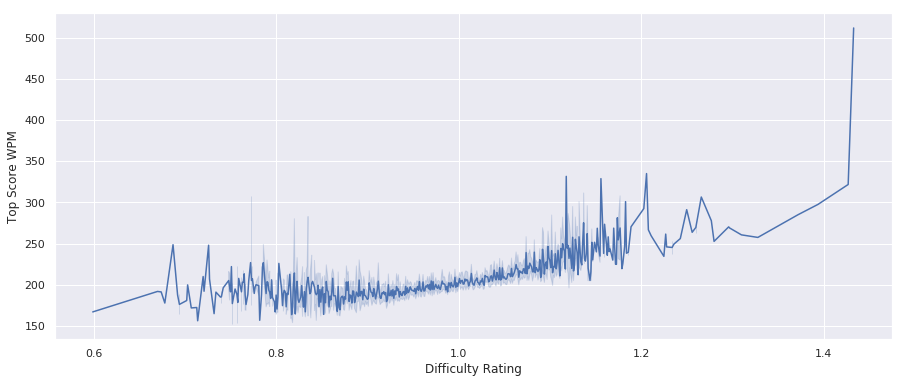

In [86]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(ax=ax, x='Difficulty Rating', y='Top Score WPM', data=df_text)

# Race Data Analysis

In [6]:
df_race = df_race.sort_values(by='Race')

In [7]:
df_race.head()

,Race,Date,WPM,Accuracy,Text_Id,Date_Epoch,Date_Month,Date_Year,Date_Day,Outcome_Rank,Outcome_No_Racers
4125,1,2015-10-10 00:40:23,57.92,0.95,172,1444455623,October,2015,10,2,2
4124,2,2015-10-10 00:41:32,51.98,0.93,44,1444455692,October,2015,10,3,3
4123,3,2015-10-10 00:42:37,62.23,0.96,546,1444455757,October,2015,10,2,3
4122,4,2015-10-10 00:44:03,54.55,0.91,321,1444455843,October,2015,10,3,3
4121,5,2015-10-10 00:45:21,57.53,0.93,555,1444455921,October,2015,10,2,2


In [85]:
df_race["Date"] = df.Date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [91]:
df_race['month'] = df_race['Date'].dt.strftime('%b')

In [10]:
df_2015 = df_race[df_race['Date_Year'] == 2015]
df_2016 = df_race[df_race['Date_Year'] == 2016]
df_2017 = df_race[df_race['Date_Year'] == 2017]
df_2018 = df_race[df_race['Date_Year'] == 2018]

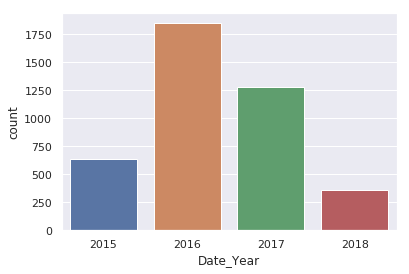

In [11]:
sns.countplot(x='Date_Year', data = df_race)

I started my typing journey in October 2015 and since have completed more than 4000 races. Even though it looks like I played 

## Progress since I first started using Typeracer (How has my speed, accuracy, rank increased/varied with respect to time)

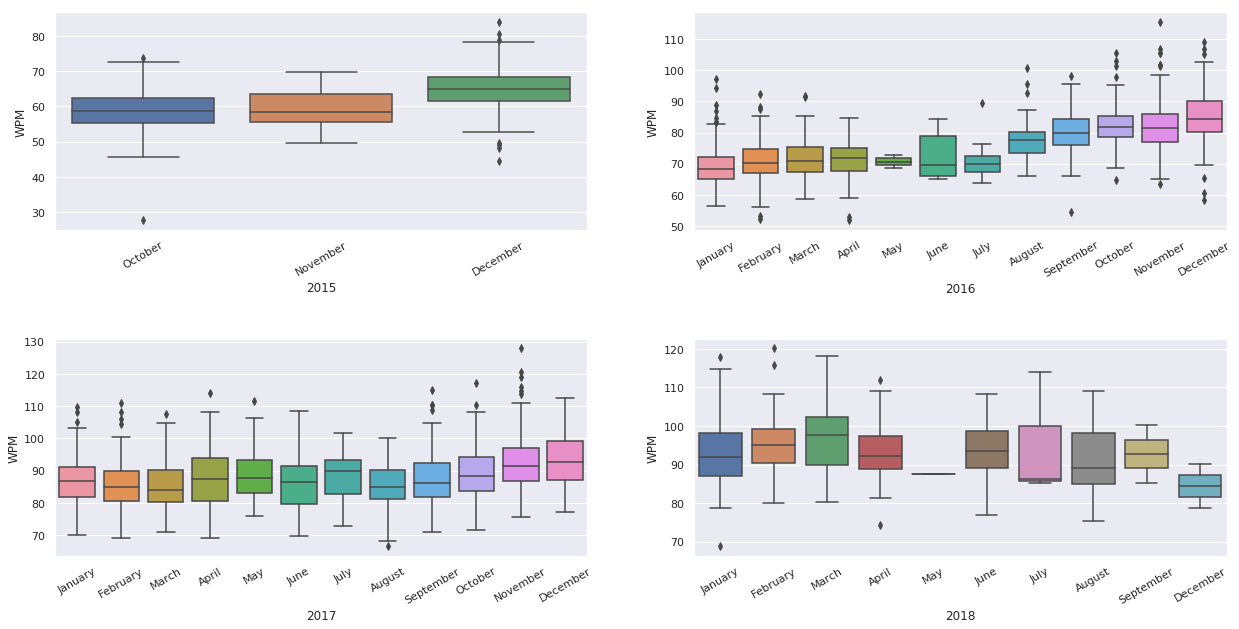

In [12]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches((21,10))
g = sns.boxplot(x='Date_Month',y='WPM',data=df_2015,ax=axes[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_xlabel('2015')

g = sns.boxplot(x='Date_Month',y='WPM',data=df_2016,ax=axes[0,1])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_xlabel('2016')

g = sns.boxplot(x='Date_Month',y='WPM',data=df_2017,ax=axes[1,0])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_xlabel('2017')

g = sns.boxplot(x='Date_Month',y='WPM',data=df_2018,ax=axes[1,1])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_xlabel('2018')

plt.subplots_adjust(hspace=0.5)
plt.show()

/home/niraj/.virtualenvs/text/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



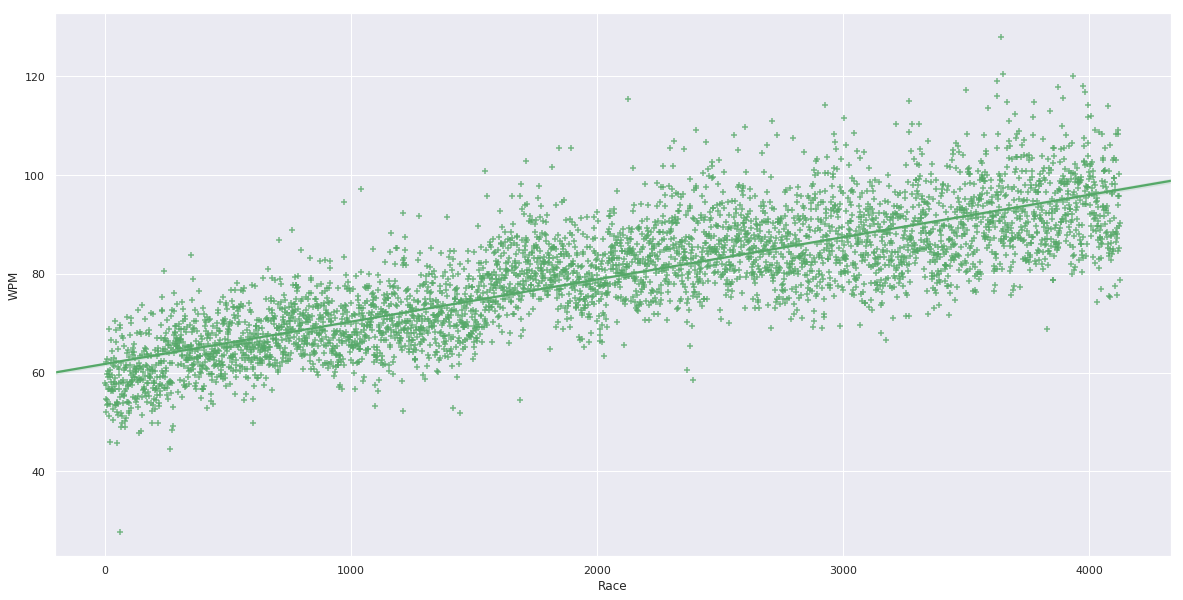

In [129]:
fig, ax = plt.subplots(figsize=(20,10))
sns.regplot(ax=ax, x="Race", y="WPM", data=df_race, marker='+', color='g')

In [131]:
fig.savefig("improvement.png")

## Questions to explore
1. How does length of the text affect speed? Can it be used as a feature for prediction?
2. How many distinct bifurcations of speeds can be achieved for classification?
3. Can mistakes be included as a feature?
4. Experiment with both regression and classification
5. CountVectorizer with and without stopwords
6. What words are the most troublesome for me? Improvement scope

In [71]:
df_merged = df_race.merge(df_text[['Text_Id', 'Length', 'Text', 'Difficulty Rating', 'Average']], on='Text_Id')

In [56]:
df_merged_sorted_length = df_merged.sort_values(by='Length', ascending=False)

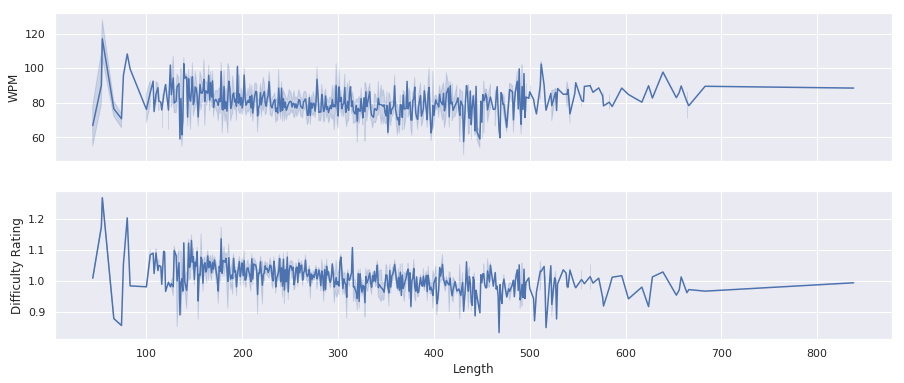

In [72]:
fig, axes = plt.subplots(nrows=2, figsize=(15,6), sharex=True)
sns.lineplot(ax=axes[0], x='Length', y='WPM', data=df_merged)
sns.lineplot(ax=axes[1], x='Length', y='Difficulty Rating', data=df_merged)

### Speed and Difficulty rating across Punctuation count

In [73]:
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
df_merged['Punctuation_Count'] = [count(val, string.punctuation) for val in df_merged['Text']]

In [75]:
# df_merged_sorted_pun_count = df_merged.sort_values(by='Punctuation_Count', ascending=True)
df_merged[['Text', 'Punctuation_Count']].head()

,Text,Punctuation_Count
0,"Look, Ross, you gotta understand, between us w...",12
1,Harry could hardly believe this was real. Four...,10
2,Ideology: the process of making ideas. Certain...,5
3,Ideology: the process of making ideas. Certain...,5
4,Ideology: the process of making ideas. Certain...,5


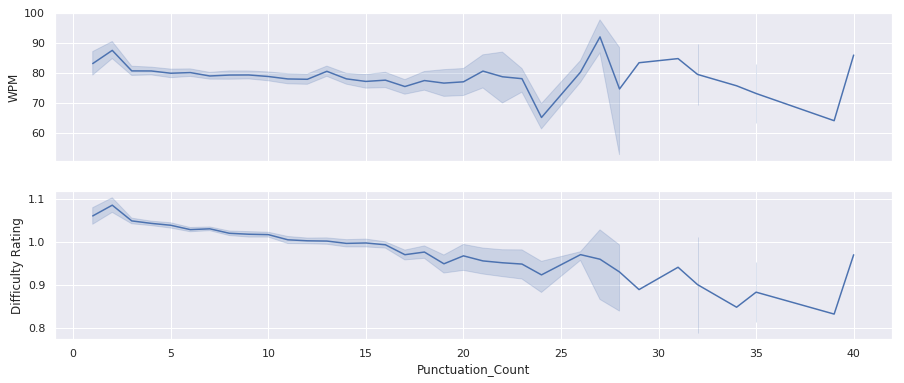

In [76]:
fig, axes = plt.subplots(nrows=2, figsize=(15,6), sharex=True)
sns.lineplot(ax=axes[0], x='Punctuation_Count', y='WPM', data=df_merged)
sns.lineplot(ax=axes[1], x='Punctuation_Count', y='Difficulty Rating', data=df_merged)

### WPM and Difficulty rating across Capital letter count in text

In [77]:
df_merged["Capital_Case_Count"] = [sum([1 for c in val if c.isupper()]) for val in df_merged['Text']]

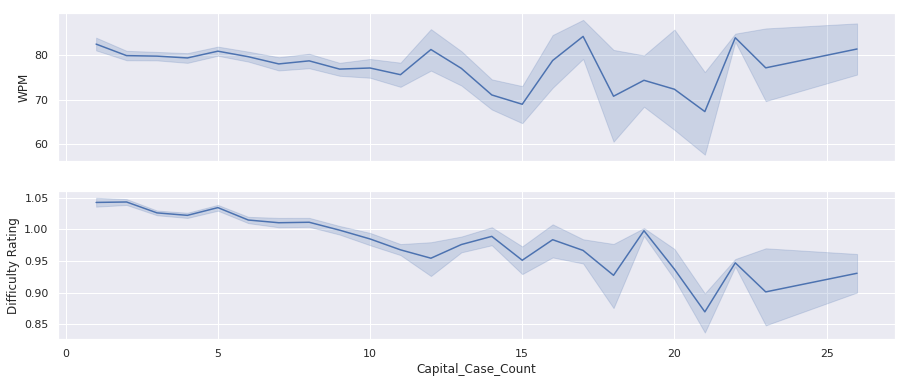

In [78]:
fig, axes = plt.subplots(nrows=2, figsize=(15,6), sharex=True)
sns.lineplot(ax=axes[0], x='Capital_Case_Count', y='WPM', data=df_merged)
sns.lineplot(ax=axes[1], x='Capital_Case_Count', y='Difficulty Rating', data=df_merged)

# Correlation between text and speed on a syntactic level

In [109]:
vectorizer = CountVectorizer(lowercase=False, ngram_range=(1,4))
matrix = vectorizer.fit_transform(df_merged.sort_values(by='Race', ascending='False')[:2500]['Text'].values)
vectorizer.get_feature_names()

['000',
 '000 Mesoamericans',
 '000 Mesoamericans of',
 '000 Mesoamericans of many',
 '000 tons',
 '000 tons of',
 '000 tons of gold',
 '10',
 '10 issues',
 '10 issues to',
 '10 issues to discuss',
 '100',
 '100 AD',
 '100 AD Wood',
 '100 AD Wood and',
 '101',
 '126',
 '126 words',
 '126 words minute',
 '126 words minute at',
 '13',
 '13 1888',
 '14',
 '14 percent',
 '14 percent alcohol',
 '14 percent alcohol because',
 '14 percent alcohol either',
 '14 percent halting',
 '14 percent halting the',
 '150',
 '150 000',
 '150 000 tons',
 '150 000 tons of',
 '1873',
 '1873 the',
 '1873 the Sholes',
 '1873 the Sholes Glidden',
 '1888',
 '1896',
 '1896 was',
 '1896 was crossing',
 '1896 was crossing over',
 '1937',
 '1937 Fortune',
 '1937 Fortune magazine',
 '1937 Fortune magazine article',
 '1960s',
 '1960s growing',
 '1960s growing number',
 '1960s growing number of',
 '1966',
 '1966 Andy',
 '1966 Andy Dufresne',
 '1966 Andy Dufresne escaped',
 '1966 reporter',
 '1966 reporter asked',
 '19

In [121]:
matrix[0].toarray()

[[0 0 0 ... 0 0 0]]


### PCA

In [110]:
pca = PCA(n_components=2)
transformed_dimensions = pca.fit_transform(matrix.toarray())

### TSNE

In [113]:
tsne_init = 'random'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model.fit_transform(matrix.toarray())
print(transformed_centroids)

[[ 46.191566 -57.511124]
 [ -8.349282 -61.81673 ]
 [ 13.341247 -91.05374 ]
 ...
 [ 43.802452 -33.11033 ]
 [  5.937761  23.836437]
 [ 21.68956   60.26827 ]]


### Visualization in 2d space

In [104]:
data_labels = list()
separator = " "
for doc in df_merged["Text"].values:
    word_array = doc.split(separator)
    n_words = len(doc.split(separator))
    for i in range(10, n_words, 10):
        word_array.insert(i, "<br>")
    sen = separator.join(word_array)
    data_labels.append(sen)

In [114]:
import plotly.graph_objs as go
import plotly.offline as py

import numpy as np

trace1 = go.Scatter(
    x = transformed_centroids[:, 0],
    y = transformed_centroids[:, 1],
    mode='markers',
    text=data_labels,
    marker=dict(
        size=16,
        color = df_merged['WPM'], #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

py.plot(data, filename='Text correlation with Speed')

/home/niraj/.virtualenvs/text/lib/python3.5/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `Text correlation with Speed` didn't end with .html. Adding .html to the end of your file.



'file:///home/niraj/DSND/Project6(kaggle_blog)/Text correlation with Speed.html'

In [ ]:
import plotly
from plotly.graph_objs import Scatter,Layout

# filename = "_".join([str(i) for i in [method, min_df, ngram_range]]) + ".html"

# Define trace
trace1 = Scatter(x= transformed_centroids[:, 0], 
                 y= transformed_centroids[:, 1], 
                 mode = 'markers', 
                 text=data_labels,
                 marker={
                        "opacity": 0.8,
                        "size": 20
            })

# Create chart 
# Output will be stored as a html file. 
# Whenever we will open output html file, one popup option will ask us about if want to save it in jpeg format. 
plotly.offline.plot({
                        "data": [trace1], 
                         # <b> and </b>: Bold title 
                         # <br> use this for line break.
                        "layout": Layout(title="<b>Scatter plot of Issues</b>", 
                                                   xaxis= dict(
                                                        title= '<b>Aggregated Component 1</b>',
                                                        zeroline= False,
                                                        gridcolor='rgb(183,183,183)',
                                                        showline=True
                                                    ),
                                                    yaxis=dict(
                                                        title= '<b>Aggregated Component 2</b>',
                                                        gridcolor='rgb(183,183,183)',
                                                        zeroline=False,
                                                        showline=True
                                                    ))
},filename="word2vec_avg")

In [115]:
df_merged.to_csv("races_text_merged.csv")